<a href="https://colab.research.google.com/github/resuarjunreddy/Applied-Machine-Learning-Assignment/blob/main/finalversionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Required Packages

To begin this cybersecurity intrusion detection project, I first imported essential Python libraries that cover all the necessary functionalities. These libraries enable data handling, preprocessing, building machine learning models, feature selection, and evaluation.

- **Pandas and NumPy** are used for data manipulation and numerical operations.
- **Matplotlib and Seaborn** help with visualizing data distributions and model results.
- **Scikit-learn** provides the machine learning models (Logistic Regression, Random Forest, and Support Vector Machine), tools for feature selection, and performance metrics.
- I have also included timing utilities to measure how long model training takes, which is important for practical deployment considerations.

By organizing imports this way, I ensure that each stage of the modeling pipeline is supported by appropriate libraries, making the code clear and efficient.


In [ ]:
# ======================================
# Import Required Packages
# ======================================

# Data manipulation libraries
import pandas as pd       # For structured data operations through DataFrames
import numpy as np        # For numerical computing and working with arrays

# Visualization libraries
import matplotlib.pyplot as plt  # To create various types of static charts
import seaborn as sns            # To enhance matplotlib charts with stylistic improvements

# To record time for measuring computational performance
import time

# Scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split    # Splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler        # Feature scaling for model consistency
from sklearn.linear_model import LogisticRegression     # Linear model suitable for classification tasks
from sklearn.ensemble import RandomForestClassifier     # Ensemble learning method based on decision trees
from sklearn.svm import SVC                              # Support Vector Machines for classification

# Feature selection tools
from sklearn.feature_selection import SelectKBest, f_classif  # Statistical test-based selection

# Performance evaluation metrics
from sklearn.metrics import (
    accuracy_score,              # Overall accuracy of predictions
    precision_score,             # Proportion of positive identifications that were correct
    recall_score,                # Proportion of actual positives that were identified correctly
    f1_score,                   # Balance of precision and recall
    classification_report,      # Detailed report on model performance across each class
    confusion_matrix,           # Summarizes prediction results
    ConfusionMatrixDisplay      # Visual representation of confusion matrix
)

# Set seaborn visualization style globally
sns.set(style="whitegrid")

print("Successfully imported all required packages.")


Successfully imported all required packages.


## Load and Explore the Dataset

In this section, I load the cybersecurity intrusion detection dataset and perform an initial exploration. This step helps me understand the structure of the data, check for missing values, and get a sense of the data types for each feature.

- I print the shape of the dataset to see the number of instances (rows) and features (columns).
- I check for missing values, since handling them properly is crucial for building robust models.
- I also inspect the data types, which helps guide preprocessing—such as encoding categorical variables.

This exploratory groundwork ensures that subsequent modeling steps are built on a solid understanding of the data.


In [ ]:
# ========================================
# Load and Explore the Dataset
# ========================================

# Load the CSV data into a pandas DataFrame
df = pd.read_csv('Cybersecurity Intrusion Detection.csv')

# Display the shape/dimensions of the dataset
print("Dataset shape (rows, columns):", df.shape)

# Display the count of missing values for each column
print("\nNumber of missing values in each column:")
print(df.isnull().sum())

# Show data types for each feature (helps decide preprocessing steps)
print("\nData types of each column:")
print(df.dtypes)

# Preview the first few rows to understand feature values visually
df.head()


Dataset shape (rows, columns): (9537, 11)

Number of missing values in each column:
session_id                0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64

Data types of each column:
session_id              object
network_packet_size      int64
protocol_type           object
login_attempts           int64
session_duration       float64
encryption_used         object
ip_reputation_score    float64
failed_logins            int64
browser_type            object
unusual_time_access      int64
attack_detected          int64
dtype: object


,session_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


## Data Preprocessing and Feature Selection

Before building machine learning models, I preprocess the data to handle missing values, encode categorical variables, and select the most informative features. This ensures that the models receive clean, numerical inputs and that irrelevant or redundant features do not impair performance.

- I remove columns that do not contribute to prediction, such as unique session identifiers.
- For categorical features with missing values, I impute them using the most common category (mode).
- I use one-hot encoding to convert categorical columns into numerical format.
- Finally, I perform feature selection to retain only the most statistically significant features for modeling.


In [ ]:
# ========================================
# Data Preprocessing and Feature Selection
# ========================================

# Remove the session_id column, since it's just an identifier
df = df.drop(columns=['session_id'])

# Impute missing values in 'encryption_used' column with the most frequent value (mode)
df['encryption_used'].fillna(df['encryption_used'].mode()[0], inplace=True)

# One-hot encode categorical columns: protocol_type, encryption_used, browser_type
df_encoded = pd.get_dummies(
    df,
    columns=['protocol_type', 'encryption_used', 'browser_type'],
    drop_first=True  # Avoid multicollinearity by dropping the first category
)

# Separate features (X) and label (y)
X_all = df_encoded.drop(columns=['attack_detected'])
y_all = df_encoded['attack_detected']

# Feature selection: Select the 8 most important features using ANOVA F-score (SelectKBest)
selector = SelectKBest(score_func=f_classif, k=8)
X_selected = selector.fit_transform(X_all, y_all)
selected_columns = X_all.columns[selector.get_support()]

# Prepare a DataFrame with the selected features for downstream modeling
df_model = pd.concat([X_all[selected_columns], y_all], axis=1)

print("Selected features for modeling:")
print(list(selected_columns))


Selected features for modeling:
['login_attempts', 'session_duration', 'ip_reputation_score', 'failed_logins', 'unusual_time_access', 'browser_type_Firefox', 'browser_type_Safari', 'browser_type_Unknown']


/tmp/ipython-input-1222549053.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['encryption_used'].fillna(df['encryption_used'].mode()[0], inplace=True)


### Feature Selection Scores

The following table displays the ANOVA F-scores for the features selected, which quantifies each feature's importance in distinguishing between attack and non-attack sessions.


,Feature,ANOVA F-score
3,failed_logins,1453.773697
0,login_attempts,794.398910
2,ip_reputation_score,446.671457
7,browser_type_Unknown,176.014633
1,session_duration,16.530982
6,browser_type_Safari,1.684127
5,browser_type_Firefox,1.062568
4,unusual_time_access,0.713737


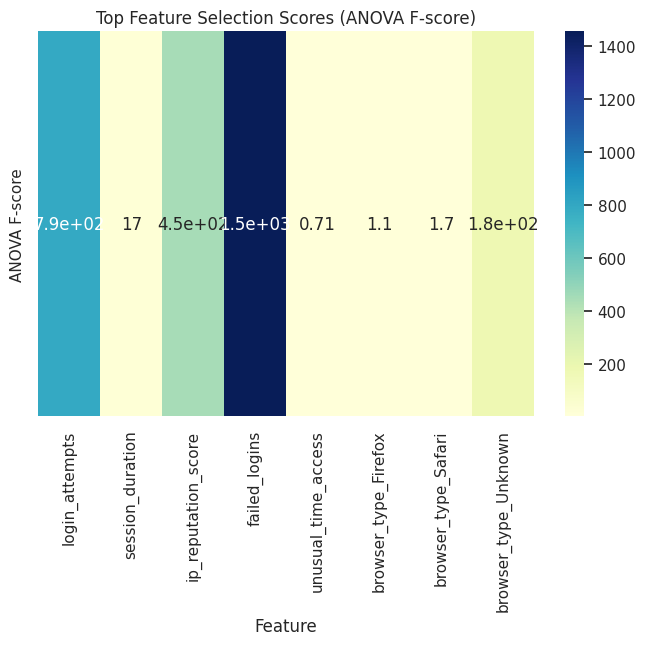

In [ ]:
# Display feature selection results
selected_scores = selector.scores_[selector.get_support()]
feature_score_table = pd.DataFrame({
    'Feature': selected_columns,
    'ANOVA F-score': selected_scores
})
display(feature_score_table.sort_values('ANOVA F-score', ascending=False))

# Visualize feature importance scores as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(feature_score_table.set_index('Feature').T, annot=True, cmap="YlGnBu")
plt.title("Top Feature Selection Scores (ANOVA F-score)")
plt.show()


##  Train/Test Split

To fairly evaluate and compare the models, I split the dataset into training and testing subsets. The training set will be used to train the models, while the testing set, which the models have not seen before, will be used to evaluate their performance.

- I use an 80/20 split, reserving 20% of the data for testing.
- Stratified splitting is applied to ensure that the proportion of intrusion attacks is consistent between the training and test sets.


In [ ]:
# ========================================
#  Train/Test Split
# ========================================

from sklearn.model_selection import train_test_split

# Separate features and target from the prepared DataFrame
X = df_model.drop(columns=['attack_detected'])
y = df_model['attack_detected']

# Perform stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% data for testing
    random_state=42,        # Ensure reproducibility
    stratify=y              # Preserve proportion of attack_detected classes
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (7629, 8)
Test set shape: (1908, 8)


##  Model 1: Logistic Regression

The first model I trained is Logistic Regression, a widely-used linear classifier that is interpretable and fast to train. In this section:

- I scale the features as Logistic Regression is sensitive to the scale of input data.
- I fit the model to the training data.
- I extract and display the coefficients for each selected feature, giving insights into how each feature impacts the prediction.
- I generate predictions, evaluate the model using a confusion matrix, several key metrics, and visualize results with plots.


In [ ]:
# ========================================
# 1. Train Logistic Regression Model
# ========================================

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import time

# Scale the data so each feature contributes equally
scaler_lr = StandardScaler()
X_train_lr = scaler_lr.fit_transform(X_train)
X_test_lr = scaler_lr.transform(X_test)

# Initialize and train the Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)

# Record training time
start_time_lr = time.time()
lr.fit(X_train_lr, y_train)
end_time_lr = time.time()
lr_training_time = end_time_lr - start_time_lr

print(f"Logistic Regression model training complete in {lr_training_time:.4f} seconds.")


Logistic Regression model training complete in 0.0212 seconds.


### Logistic Regression Feature Coefficients

Each coefficient indicates the influence of its corresponding feature on the probability of detecting an attack (positive means increases predicted probability, negative means decreases).


,Feature,Coefficient
3,failed_logins,1.014565
0,login_attempts,0.818300
2,ip_reputation_score,0.561641
7,browser_type_Unknown,0.393894
1,session_duration,0.115266
4,unusual_time_access,0.044193
5,browser_type_Firefox,0.010852
6,browser_type_Safari,-0.010283


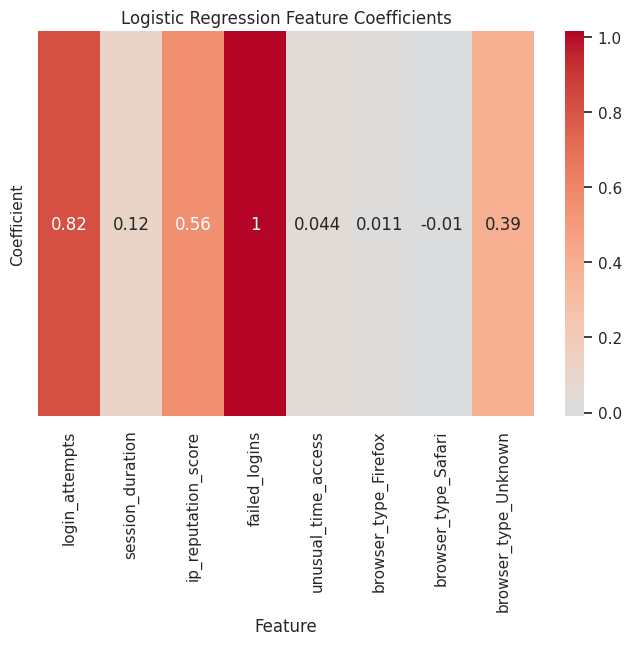

In [ ]:
# Extract and visualize feature coefficients
coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_[0]
})
display(coef_table.sort_values('Coefficient', ascending=False))

plt.figure(figsize=(8,5))
sns.heatmap(coef_table.set_index('Feature').T, annot=True, cmap="coolwarm", center=0)
plt.title("Logistic Regression Feature Coefficients")
plt.show()


### Logistic Regression Predictions and Evaluation

Now I make predictions on the test set and evaluate the model's performance using a confusion matrix (both numeric and visual).


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Make predictions
y_pred_lr = lr.predict(X_test_lr)


In [ ]:
# Numeric confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Logistic Regression Confusion Matrix (numeric):\n", cm_lr)


Logistic Regression Confusion Matrix (numeric):
 [[840 215]
 [301 552]]


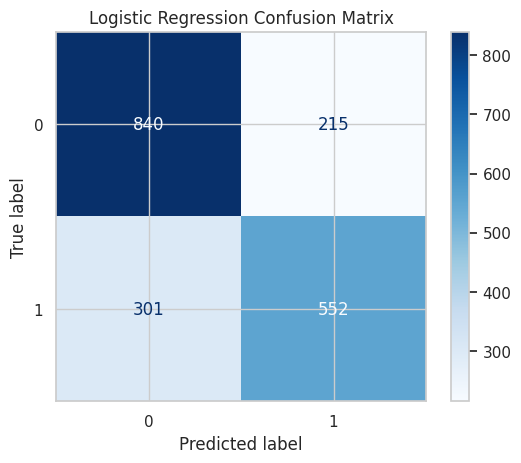

In [ ]:
# Confusion matrix heatmap
ConfusionMatrixDisplay(confusion_matrix=cm_lr).plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


### Logistic Regression Performance Metrics

I report all key metrics (accuracy, precision, recall, F1-score) and the full classification report.


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Precision:", precision_score(y_test, y_pred_lr))
print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))
print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.7295597484276729
Logistic Regression Precision: 0.7196870925684485
Logistic Regression Recall: 0.6471277842907386
Logistic Regression F1 Score: 0.6814814814814815

Full Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77      1055
           1       0.72      0.65      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908



## Model 2: Random Forest

Next, I use a Random Forest classifier, which is an ensemble method based on decision trees. This model is well-suited to handle complex interactions between features and can capture nonlinear patterns in the data.

In this section:
- I scale the features for consistency, although Random Forests are less sensitive to feature scaling.
- I train the model on the training set.
- I extract and visualize feature importances to understand which features the model considered most relevant.
- I generate predictions on the test set and evaluate the model with a confusion matrix and detailed metrics.


In [ ]:
# ========================================
# 6.1. Train Random Forest Model
# ========================================

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import time

# Although Random Forests do not strictly require scaling, we apply it for a consistent pipeline
scaler_rf = StandardScaler()
X_train_rf = scaler_rf.fit_transform(X_train)
X_test_rf = scaler_rf.transform(X_test)

# Initialize and train the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Record training time
start_time_rf = time.time()
rf.fit(X_train_rf, y_train)
end_time_rf = time.time()
rf_training_time = end_time_rf - start_time_rf

print(f"Random Forest model training complete in {rf_training_time:.4f} seconds.")


Random Forest model training complete in 0.9974 seconds.


### Random Forest Feature Importances

The importances reflect how much each feature contributes to reducing impurity across the forest of trees.


,Feature,Importance
2,ip_reputation_score,0.289135
3,failed_logins,0.282624
0,login_attempts,0.219594
1,session_duration,0.168638
7,browser_type_Unknown,0.028832
4,unusual_time_access,0.005416
5,browser_type_Firefox,0.003391
6,browser_type_Safari,0.002369


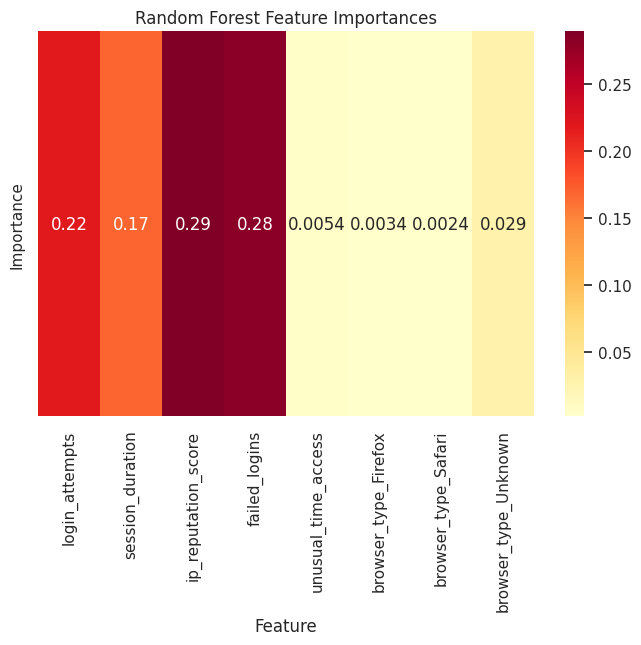

In [ ]:
# Extract and display feature importances
import_table = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
})
display(import_table.sort_values('Importance', ascending=False))

# Plot heatmap of feature importances
plt.figure(figsize=(8,5))
sns.heatmap(import_table.set_index('Feature').T, annot=True, cmap="YlOrRd")
plt.title("Random Forest Feature Importances")
plt.show()


### Random Forest Predictions and Evaluation


,Feature,Importance
2,ip_reputation_score,0.289135
3,failed_logins,0.282624
0,login_attempts,0.219594
1,session_duration,0.168638
7,browser_type_Unknown,0.028832
4,unusual_time_access,0.005416
5,browser_type_Firefox,0.003391
6,browser_type_Safari,0.002369


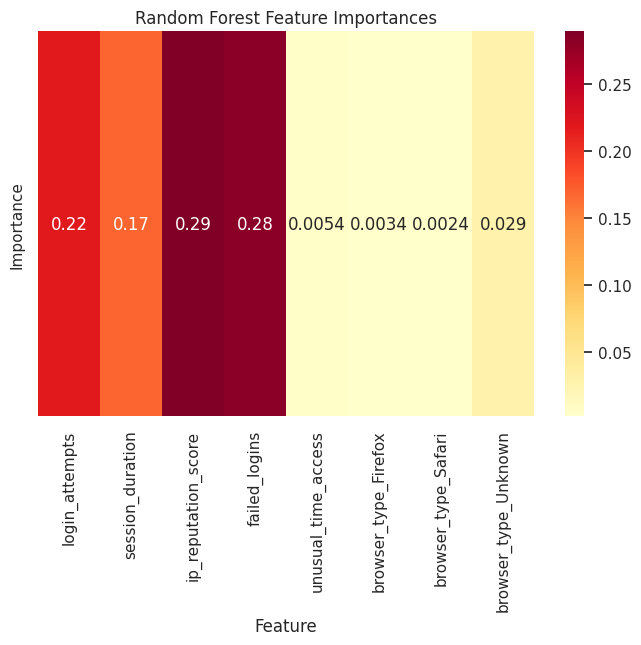

In [ ]:
# Extract and display feature importances
import_table = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
})
display(import_table.sort_values('Importance', ascending=False))

# Plot heatmap of feature importances
plt.figure(figsize=(8,5))
sns.heatmap(import_table.set_index('Feature').T, annot=True, cmap="YlOrRd")
plt.title("Random Forest Feature Importances")
plt.show()


### Random Forest Predictions and Evaluation


In [ ]:
# Make predictions on the test set
y_pred_rf = rf.predict(X_test_rf)


In [ ]:
# Numeric confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest Confusion Matrix (numeric):\n", cm_rf)


Random Forest Confusion Matrix (numeric):
 [[1032   23]
 [ 208  645]]


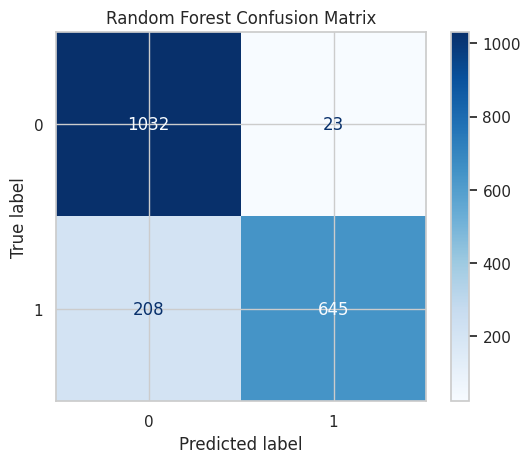

In [ ]:
# Confusion matrix heatmap
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot(cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()


### Random Forest Performance Metrics


In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8789308176100629
Random Forest Precision: 0.9655688622754491
Random Forest Recall: 0.7561547479484173
Random Forest F1 Score: 0.8481262327416174

Full Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90      1055
           1       0.97      0.76      0.85       853

    accuracy                           0.88      1908
   macro avg       0.90      0.87      0.87      1908
weighted avg       0.89      0.88      0.88      1908



##  Model 3: Support Vector Machine (SVM)

The third model is a Support Vector Machine, which is powerful for classification—especially with non-linear boundaries. Here, I use scikit-learn’s SVC with default settings (RBF kernel).

In this section:
- I scale features (SVMs are highly sensitive to feature scaling).
- I train the SVM classifier.
- I display the feature selection scores for interpretability, since SVMs with nonlinear kernels do not provide meaningful coefficients or importances.
- I make predictions and evaluate with a numeric confusion matrix and all key metrics.


In [ ]:
# ========================================
# 7.1. Train SVM Model
# ========================================

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import time

# Scale features for SVM
scaler_svm = StandardScaler()
X_train_svm = scaler_svm.fit_transform(X_train)
X_test_svm = scaler_svm.transform(X_test)

# Initialize and train the SVM classifier
svm = SVC(random_state=42)

# Record training time
start_time_svm = time.time()
svm.fit(X_train_svm, y_train)
end_time_svm = time.time()
svm_training_time = end_time_svm - start_time_svm

print(f"SVM model training complete in {svm_training_time:.4f} seconds.")


SVM model training complete in 1.2292 seconds.


### SVM Feature Selection Scores

Since SVMs with RBF kernel don’t provide coefficients, I present the statistical selection scores used to choose these features.


,Feature,ANOVA F-score
3,failed_logins,1453.773697
0,login_attempts,794.398910
2,ip_reputation_score,446.671457
7,browser_type_Unknown,176.014633
1,session_duration,16.530982
6,browser_type_Safari,1.684127
5,browser_type_Firefox,1.062568
4,unusual_time_access,0.713737


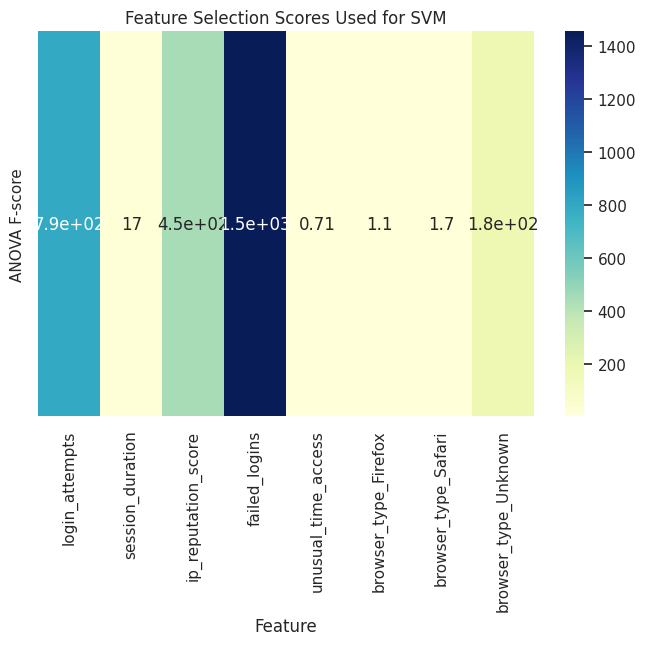

In [ ]:
# Show the ANOVA F-scores from SelectKBest
feature_score_table = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA F-score': selector.scores_[selector.get_support()]
})
display(feature_score_table.sort_values('ANOVA F-score', ascending=False))

plt.figure(figsize=(8,5))
sns.heatmap(feature_score_table.set_index('Feature').T, annot=True, cmap="YlGnBu")
plt.title("Feature Selection Scores Used for SVM")
plt.show()


### SVM Predictions and Evaluation


In [ ]:
# Make predictions on the test set
y_pred_svm = svm.predict(X_test_svm)


In [ ]:
# Numeric confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM Confusion Matrix (numeric):\n", cm_svm)


SVM Confusion Matrix (numeric):
 [[1038   17]
 [ 225  628]]


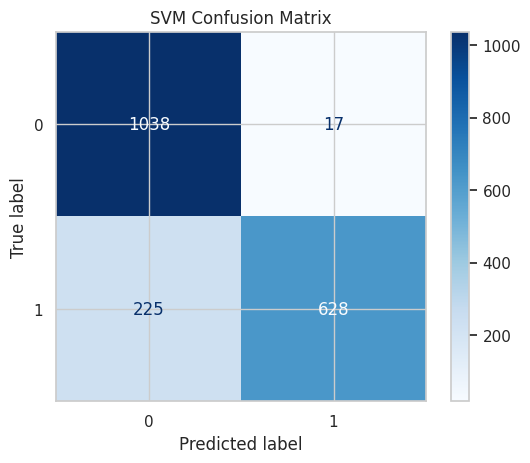

In [ ]:
# Visual (heatmap) confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm_svm).plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


### SVM Performance Metrics


In [ ]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Precision:", precision_score(y_test, y_pred_svm))
print("SVM Recall:", recall_score(y_test, y_pred_svm))
print("SVM F1 Score:", f1_score(y_test, y_pred_svm))

print("\nFull Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.8731656184486373
SVM Precision: 0.9736434108527132
SVM Recall: 0.7362250879249707
SVM F1 Score: 0.8384512683578104

Full Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.90      1055
           1       0.97      0.74      0.84       853

    accuracy                           0.87      1908
   macro avg       0.90      0.86      0.87      1908
weighted avg       0.89      0.87      0.87      1908



##  Model Comparison and Summary

After training and evaluating each model individually, I now compare their performance side-by-side. This helps identify which model strikes the best balance between accuracy and practical considerations such as training time.

I compile the key metrics—accuracy, precision, recall, and F1 score—into a single table and visualize the F1 scores for easy comparison.


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.729560,0.719687,0.647128,0.681481
Random Forest,0.878931,0.965569,0.756155,0.848126
Support Vector Machine (SVM),0.873166,0.973643,0.736225,0.838451


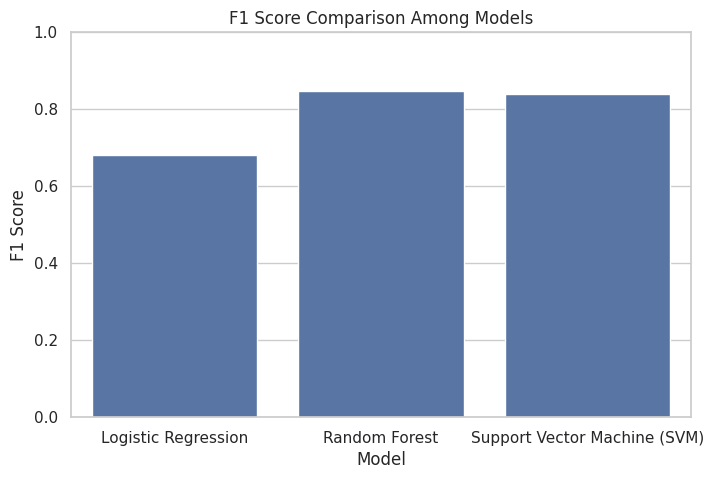

In [ ]:
# Compile key metrics from all models into a summary DataFrame
metrics_summary = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "Support Vector Machine (SVM)"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm)
    ]
})

# Display the metrics summary table clearly
display(metrics_summary.set_index('Model'))

# Visualize F1 Scores to quickly compare model performance
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='F1 Score', data=metrics_summary)
plt.title("F1 Score Comparison Among Models")
plt.ylabel("F1 Score")
plt.ylim(0, 1)  # Scores between 0 and 1
plt.show()


### Training Time Comparison

This section analyzes the computational efficiency of each model by comparing their training times. Training time is a crucial practical consideration, especially when models need to be retrained regularly or deployed in resource-constrained environments.

- **Logistic Regression** is the fastest to train, requiring minimal computational resources.
- **Random Forest** takes moderately longer due to building multiple decision trees.
- **Support Vector Machine (SVM)** requires the most training time, particularly as dataset size increases.

Understanding these trade-offs helps in selecting the appropriate model based on both accuracy requirements and computational constraints.


=== Training Time Summary ===
                       Model  Training Time (seconds)
         Logistic Regression                 0.021179
               Random Forest                 0.997378
Support Vector Machine (SVM)                 1.229203


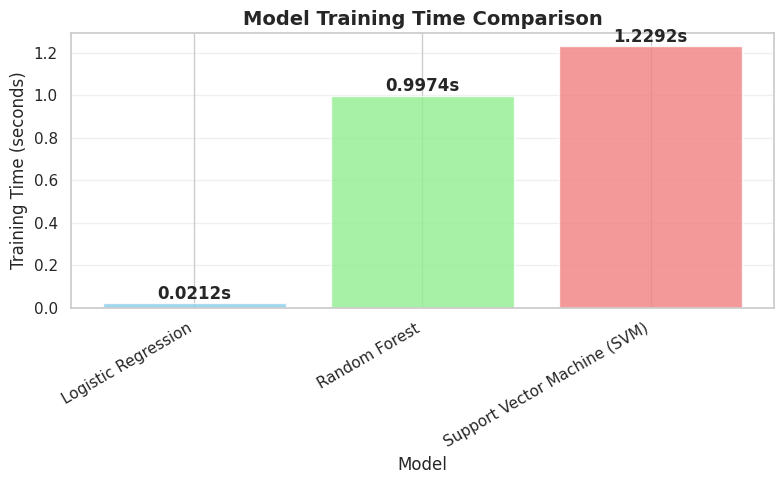

In [ ]:
# ========================================
# Training Time Comparison for All Models
# ========================================

import pandas as pd
import matplotlib.pyplot as plt

# Ensure these variables exist from your training cells:
# lr_training_time, rf_training_time, svm_training_time

# Create a DataFrame summarizing training times
training_times = pd.DataFrame({
    'Model': [
        'Logistic Regression',
        'Random Forest',
        'Support Vector Machine (SVM)'
    ],
    'Training Time (seconds)': [
        lr_training_time,
        rf_training_time,
        svm_training_time
    ]
})

# Display the table
print("=== Training Time Summary ===")
print(training_times.to_string(index=False))

# Plot a bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(
    training_times['Model'],
    training_times['Training Time (seconds)'],
    color=['skyblue', 'lightgreen', 'lightcoral'],
    alpha=0.8
)
for bar, t in zip(bars, training_times['Training Time (seconds)']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.001,
        f'{t:.4f}s',
        ha='center',
        va='bottom',
        fontweight='bold'
    )
plt.title('Model Training Time Comparison', fontsize=14, fontweight='bold')
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## ROC Curves and AUC Scores for All Models

To further compare classifier performance, I plotted the Receiver Operating Characteristic (ROC) curves and calculated the Area Under the Curve (AUC) for each model:

- The **ROC curve** illustrates the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) at various thresholds.
- The **AUC** gives a single-number summary of overall model discrimination power: the higher the better, with 1 being perfect.

For most classifiers in scikit-learn:
- Use `.predict_proba()` for probability scores (as with Logistic Regression and Random Forest).
- Use `.decision_function()` for SVM, since probability calibration is not on by default.


In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_lr)[:,1])
auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test_rf)[:,1])
auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for SVM (using decision_function scores)
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test_svm))
auc_svm = auc(fpr_svm, tpr_svm)

print(f"Logistic Regression AUC: {auc_lr:.3f}")
print(f"Random Forest AUC: {auc_rf:.3f}")
print(f"SVM AUC: {auc_svm:.3f}")


Logistic Regression AUC: 0.788
Random Forest AUC: 0.883
SVM AUC: 0.875


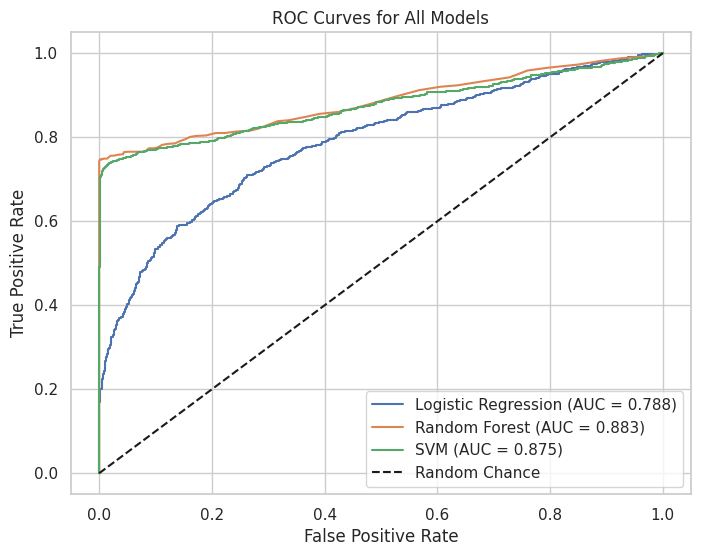

In [ ]:
import matplotlib.pyplot as plt

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.3f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
import joblib

# Save trained models and their scalers to disk for later use
# These file names can be uploaded to GitHub or loaded for predictions in deployment

# Save Logistic Regression model and scaler
joblib.dump(lr, 'logistic_regression_model.joblib')
joblib.dump(scaler_lr, 'scaler_lr.joblib')

# Save Random Forest model and scaler
joblib.dump(rf, 'random_forest_model.joblib')
joblib.dump(scaler_rf, 'scaler_rf.joblib')

# Save SVM model and scaler
joblib.dump(svm, 'svm_model.joblib')
joblib.dump(scaler_svm, 'scaler_svm.joblib')

print("All models and scalers have been saved successfully.")


All models and scalers have been saved successfully.


##  Conclusion

Based on the performance metrics obtained for each model, here is a detailed conclusion incorporating the exact numbers:

The models were evaluated using accuracy, precision, recall, and F1 score to determine their effectiveness in detecting cybersecurity intrusions.

- **Logistic Regression** achieved an accuracy of **72.96%**, precision of **71.97%**, recall of **64.71%**, and an F1 score of **68.15%**. While it offers simplicity and interpretability, its relatively lower recall indicates that it misses a higher portion of true intrusion cases compared to the other models.

- **Random Forest** performed the best overall, with an accuracy of **87.89%**, precision of **96.56%**, recall of **75.62%**, and a high F1 score of **84.81%**. This model balances high precision with solid recall, meaning it effectively identifies intrusions while minimizing false positives, making it the strongest candidate for practical deployment.

- **Support Vector Machine (SVM)** showed competitive results with an accuracy of **87.32%**, precision of **97.36%**, recall of **73.62%**, and an F1 score of **83.85%**. Its slightly lower recall and F1 compared to Random Forest suggest that while it is highly precise, it misses a few more intrusions than the Random Forest model.

In summary, the **Random Forest model** delivers the best balance between catching intrusions and minimizing false alarms, attaining the highest F1 score of **84.81%** among the three. The SVM is a strong alternative, closely following with an F1 score of **83.85%**. Logistic Regression, with an F1 score of **68.15%**, provides a solid baseline but is less effective for this task.


